In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

plt.style.use('seaborn-v0_8-darkgrid')

In [5]:
url = "https://raw.githubusercontent.com/skforecast/skforecast-datasets/main/data/store_sales.csv"
df = pd.read_csv(url, parse_dates=['date'], index_col='date')

In [6]:
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB


## First i will use LSTM in just 1 serie = 1 store and 1 Item to learn how it works

In [8]:
data = df[(df['store'] == 1) & (df['item'] == 1)]['sales']

In [9]:
data

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Name: sales, Length: 1826, dtype: int64

In [14]:
print(f'Data set size: {len(data)} days.')

Data set size: 1826 days.


### Scaling

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

In [17]:
data_scaled

array([[0.19565217],
       [0.15217391],
       [0.2173913 ],
       ...,
       [0.23913043],
       [0.5       ],
       [0.41304348]])

### Windowing

In [22]:
def create_sequence(dataset,look_back=30):
    X, y = [], []
    for i in range(len(dataset)-look_back):
        # Get last 30 days (X)
        X.append(dataset[i:i+look_back, 0])
        # Get the day 31 (y)
        y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(y)

In [23]:
LOOK_BACK = 30
X, y = create_sequence(data_scaled, LOOK_BACK)

### Test Train Split

In [21]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Reshaping

In [27]:
# LSTM input should be in the following format: (Batch_size, time_steps, noOfFeatures(units))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"Train Data Shape (X_train): {X_train.shape}")
print(f"Test Data Shape (X_test): {X_test.shape}")

Train Data Shape (X_train): (1436, 30, 1)
Test Data Shape (X_test): (360, 30, 1)


## Building and Training the model

2025-11-29 19:36:05.199723: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-11-29 19:36:05.200112: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-29 19:36:05.200133: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-11-29 19:36:05.200389: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-29 19:36:05.200425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/miniconda3/envs/tf-env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential

Training the model...
Epoch 1/20


2025-11-29 19:36:06.098024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 366ms/step - loss: 0.0627 - val_loss: 0.0144
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 352ms/step - loss: 0.0149 - val_loss: 0.0133
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 353ms/step - loss: 0.0142 - val_loss: 0.0132
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 355ms/step - loss: 0.0137 - val_loss: 0.0132
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 355ms/step - loss: 0.0136 - val_loss: 0.0131
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 355ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 364ms/step - loss: 0.0136 - val_loss: 0.0130
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 366ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 370ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 373ms/step - loss: 0.0135 - val_loss: 0.0153
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 374ms/step - loss: 0.0136 - val_loss: 0.0130
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 374ms/ste

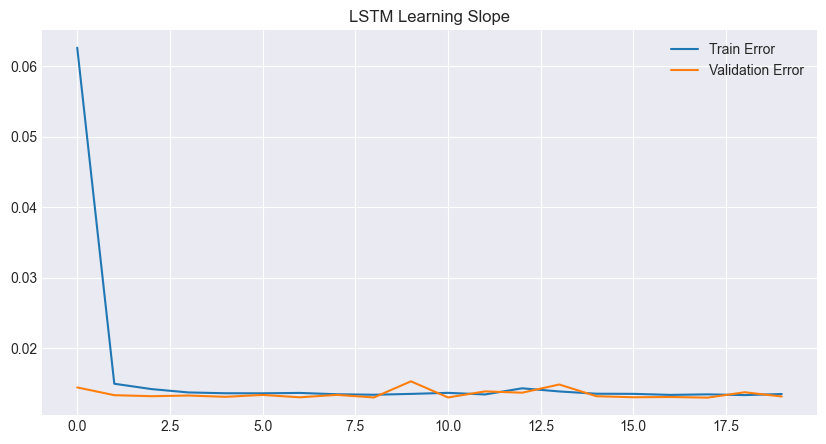

In [28]:
# Base model
model = Sequential()

# LSTM Layer
# 50 units: Number of Neurons (Sets the complexity)
# input_shape: (30 days, 1 feature)
model.add(LSTM(50, activation='relu', input_shape=(LOOK_BACK, 1)))

# Output Layer (Forecasting just one number(Tomorrow's sale))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

print('Training the model...')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Draw loss in train
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Error')
plt.plot(history.history['val_loss'], label='Validation Error')
plt.title('LSTM Learning Slope')
plt.legend()
plt.show()

### Prediction


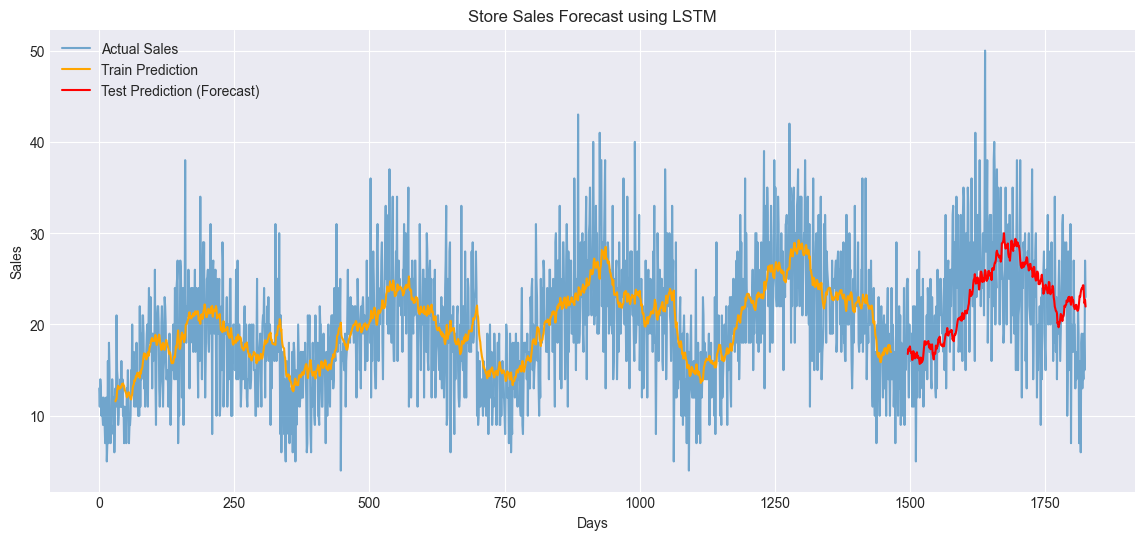

In [31]:
plt.figure(figsize=(14, 6))

# Prepare data for plotting
# Use float64 to allow NaN values for empty spaces
original_data = data.values.reshape(-1,1)

# Plotting Training Predictions
train_plot = np.empty_like(original_data, dtype=np.float64)
train_plot[:, :] = np.nan
train_plot[LOOK_BACK:len(train_predict)+LOOK_BACK, :] = train_predict

# Plotting Test Predictions
test_plot = np.empty_like(original_data, dtype=np.float64)
test_plot[:, :] = np.nan

# Calculate start and end indices for test plot to align correctly
start_idx = len(train_predict) + (LOOK_BACK * 2)
# Ensure we don't go out of bounds
valid_length = min(len(test_predict), len(test_plot[start_idx:]))
test_plot[start_idx:start_idx+valid_length, :] = test_predict[:valid_length]

# Plot everything
plt.plot(original_data, label='Actual Sales', alpha=0.6)
plt.plot(train_plot, label='Train Prediction', color='orange')
plt.plot(test_plot, label='Test Prediction (Forecast)', color='red')

plt.title('Store Sales Forecast using LSTM')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.show()

📂 Loading and preparing data...
Data Shape: (1826, 5)
Features used: ['day_of_week', 'day_of_month', 'month', 'year']
Training Input Shape: (1436, 30, 5) (Samples, TimeSteps, Features)

🧠 Building Multivariate LSTM Model...
Epoch 1/20


/opt/miniconda3/envs/tf-env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 360ms/step - loss: 0.0266 - val_loss: 0.0260
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 353ms/step - loss: 0.0182 - val_loss: 0.0175
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 352ms/step - loss: 0.0154 - val_loss: 0.0129
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 354ms/step - loss: 0.0158 - val_loss: 0.0198
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 357ms/step - loss: 0.0154 - val_loss: 0.0148
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 361ms/step - loss: 0.0144 - val_loss: 0.0145
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 373ms/step - loss: 0.0138 - val_loss: 0.0125
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 371ms/step - loss: 0.0140 - val_loss: 0.0176
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 374ms/step - loss: 0.0136 - val_loss: 0.0126
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 375ms/step - loss: 0.0139 - val_loss: 0.0127
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 392ms/step - loss: 0.0139 - val_loss: 0.0131
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 395ms/ste

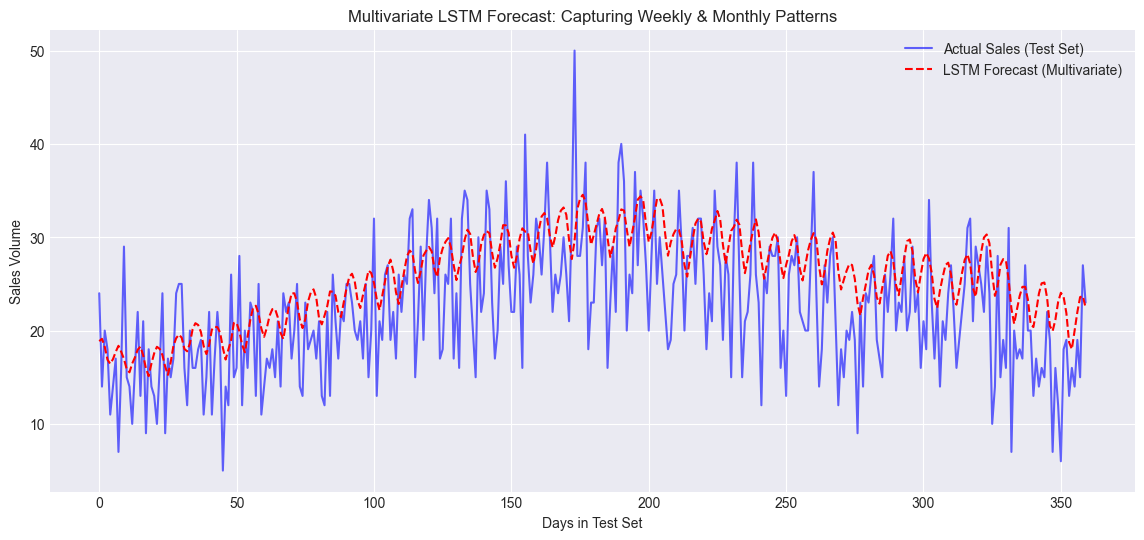

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Set plot style for professional aesthetics
plt.style.use('seaborn-v0_8-darkgrid')

# ==========================================
# 1. DATA LOADING & FEATURE ENGINEERING
# ==========================================
print("📂 Loading and preparing data...")
url = "https://raw.githubusercontent.com/skforecast/skforecast-datasets/main/data/store_sales.csv"
df = pd.read_csv(url, parse_dates=['date'], index_col='date')

# Filter for a specific Store and Item (Store 1, Item 1) to keep it manageable
df = df[(df['store'] == 1) & (df['item'] == 1)]

# --- FEATURE ENGINEERING ---
# Extracting temporal features to help the model understand seasonality
df['day_of_week'] = df.index.dayofweek  # 0: Mon, 6: Sun
df['day_of_month'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

# Reorder columns: Keep 'sales' (target) as the last column for easier processing
cols = ['day_of_week', 'day_of_month', 'month', 'year', 'sales']
df = df[cols]

print(f"Data Shape: {df.shape}")
print(f"Features used: {cols[:-1]}")

# ==========================================
# 2. DATA SCALING (NORMALIZATION)
# ==========================================
# Neural networks require input data to be scaled (0-1 range)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# ==========================================
# 3. MULTIVARIATE SEQUENCE CREATION
# ==========================================
def create_sequences_multivariate(dataset, look_back=30):
    """
    Creates sequences where X contains multiple features and y contains the target.
    Input Shape: (Samples, Time Steps, Features)
    """
    X, y = [], []
    for i in range(len(dataset) - look_back):
        # Input (X): All features for the past 'look_back' days
        X.append(dataset[i:i+look_back, :]) 
        
        # Target (y): Only the 'sales' value (last column) for the next day
        y.append(dataset[i+look_back, -1]) 
        
    return np.array(X), np.array(y)

LOOK_BACK = 30
X, y = create_sequences_multivariate(scaled_data, LOOK_BACK)

# ==========================================
# 4. TRAIN / TEST SPLIT
# ==========================================
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training Input Shape: {X_train.shape} (Samples, TimeSteps, Features)")

# ==========================================
# 5. BUILD LSTM MODEL
# ==========================================
print("\n🧠 Building Multivariate LSTM Model...")
model = Sequential()

# LSTM Layer: 64 Neurons
# Input shape takes (Time Steps, Feature Count) automatically from X_train
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))

# Dropout: Randomly ignore 20% of neurons to prevent overfitting
model.add(Dropout(0.2))

# Output Layer: Predicting a single value (Sales)
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# ==========================================
# 6. PREDICTION & INVERSE TRANSFORMATION
# ==========================================
print("\n🔮 Generating Forecasts...")
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# --- INVERSE TRANSFORM TRICK ---
# The scaler expects 5 columns, but our prediction is 1 column.
# We create a dummy matrix to satisfy the scaler's shape requirement.

# Handle Train Predictions
train_dummy = np.zeros((len(train_predict), df.shape[1])) 
train_dummy[:, -1] = train_predict[:, 0] # Place predictions in the 'sales' column
train_inverse = scaler.inverse_transform(train_dummy)[:, -1]

# Handle Test Predictions
test_dummy = np.zeros((len(test_predict), df.shape[1]))
test_dummy[:, -1] = test_predict[:, 0]
test_inverse = scaler.inverse_transform(test_dummy)[:, -1]

# Handle Actual y_test values (for comparison)
y_test_dummy = np.zeros((len(y_test), df.shape[1]))
y_test_dummy[:, -1] = y_test
y_test_inverse = scaler.inverse_transform(y_test_dummy)[:, -1]

# ==========================================
# 7. VISUALIZATION
# ==========================================
plt.figure(figsize=(14, 6))

# Plot Actual Sales (Test Data Only)
plt.plot(y_test_inverse, label='Actual Sales (Test Set)', color='blue', alpha=0.6)

# Plot Predicted Sales
plt.plot(test_inverse, label='LSTM Forecast (Multivariate)', color='red', linestyle='--')

plt.title('Multivariate LSTM Forecast: Capturing Weekly & Monthly Patterns')
plt.xlabel('Days in Test Set')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

## 📝 Conclusion & Project Summary

In this study, I developed a **Deep Learning-based Time Series Forecasting** system to predict daily store sales. Moving beyond standard statistical methods, I implemented a **Multivariate LSTM (Long Short-Term Memory)** neural network to capture complex temporal dependencies.

### Key Achievements 🚀

1.  **From Univariate to Multivariate:**
    * Initially, a simple LSTM model using only past sales data resulted in a smooth but overly generalized forecast.
    * **Improvement:** I engineered new features from the date index (`Day of Week`, `Month`, `Year`). By feeding these features into the LSTM, the model transformed from a simple regressor into a "context-aware" system.

2.  **Capturing Seasonality:**
    * The visual results of the multivariate model show a distinct "zigzag" pattern in the forecasts.
    * **Interpretation:** This confirms that the model successfully learned the **weekly seasonality** (e.g., sales rising on weekends and dropping on weekdays), significantly improving the granularity of the predictions compared to the univariate baseline.

3.  **Technical Implementation:**
    * Addressed data scaling challenges (MinMaxScaling) required for neural network convergence.
    * Solved the dimensionality mismatch issue during the inverse transformation phase by implementing a custom dummy-matrix mapping strategy.

### Future Improvements 🔮

While the model captures the general trend and weekly cycles effectively, it struggles with extreme **peak values (spikes)**. To further improve accuracy, the next steps would be:
* **Holiday Integration:** Adding an `is_holiday` boolean feature to help the model predict sudden sales spikes during festive periods.
* **Model Comparison:** Experimenting with tree-based gradient boosting models (like **XGBoost** or **LightGBM**), which often perform exceptionally well on tabular time-series data.